 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import pandas_datareader as web

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

# provides a dataframe with boolean values 
whale_returns_df.isnull()
# shows percentage of null values in each column
whale_returns_df.isnull().mean() * 100
# shows that only one cell in each column is a null value
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()

# Verifies 0 null values present
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_file = Path("Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls

# Goes through similar steps to assess quality of data as in cells above
algo_returns_df.isnull()
algo_returns_df.isnull().mean() * 100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna(how='any').copy()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_file = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
# sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype("float")

# Verifies that the "Close has become a float 
sp500_df.dtypes

C:\Users\benei\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_df['Daily Returns'] = sp500_df['Close'].pct_change()
sp500_df

,Close,Daily Returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [12]:
# Drop nulls
sp500_df.isnull().sum()
sp500_df = sp500_df.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_df.drop(columns="Close")
sp500_returns_df = sp500_returns_df.rename(columns={'Daily Returns':'S&P 500'})
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

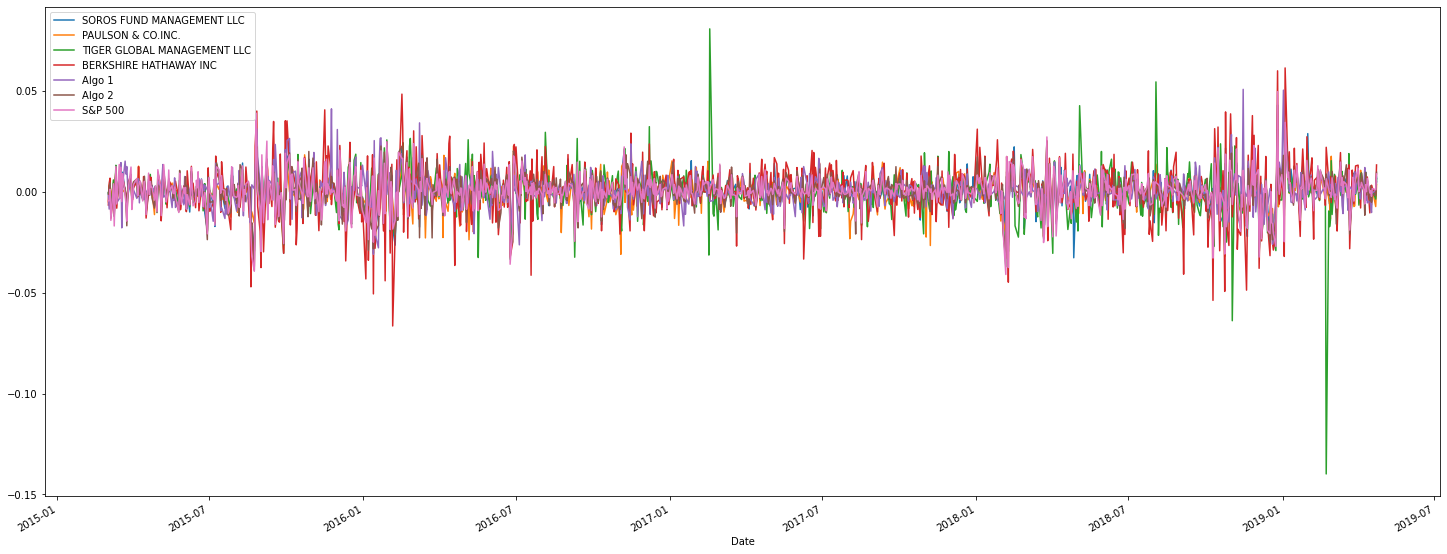

In [15]:
# Plot daily returns of all portfolios
returns_graph = combined_returns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

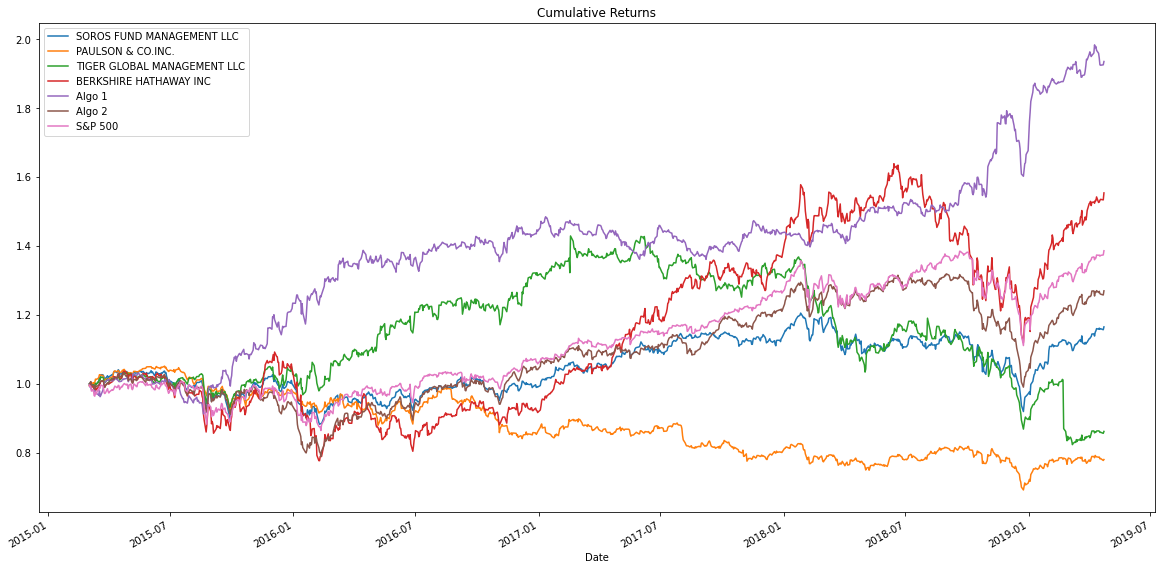

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() 
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

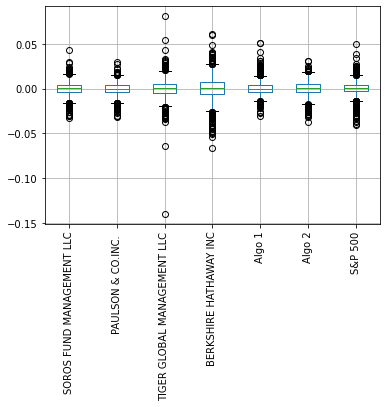

In [17]:
# Box plot to visually show risk
combined_returns.boxplot(rot=90)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp_daily_std = daily_std['S&P 500']

# Determine which portfolios are riskier than the S&P 500 and prints
for fund in daily_std:
    if fund > sp_daily_std:
        print(f"{daily_std.loc[daily_std == fund].index[0]} is riskier that the S&P 500")
        

TIGER GLOBAL MANAGEMENT LLC is riskier that the S&P 500
BERKSHIRE HATHAWAY INC is riskier that the S&P 500


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

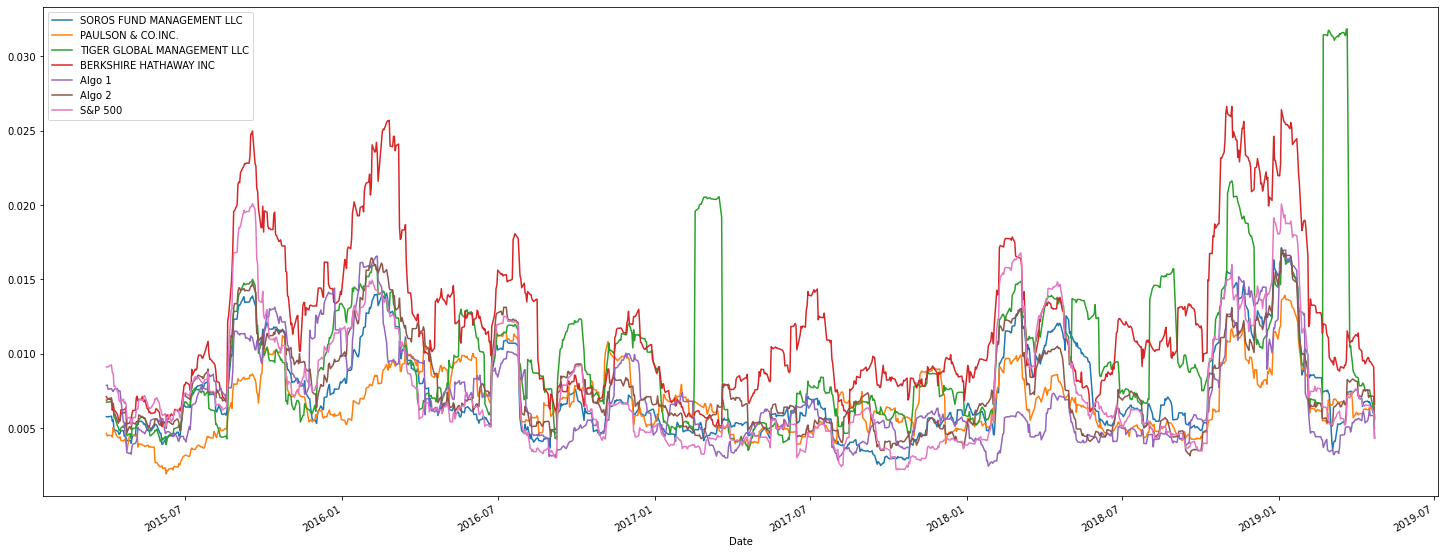

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window; plots to graph
combined_returns.rolling(window=21).std().plot(figsize=(25, 10))

### Calculate and plot the correlation

<AxesSubplot:>

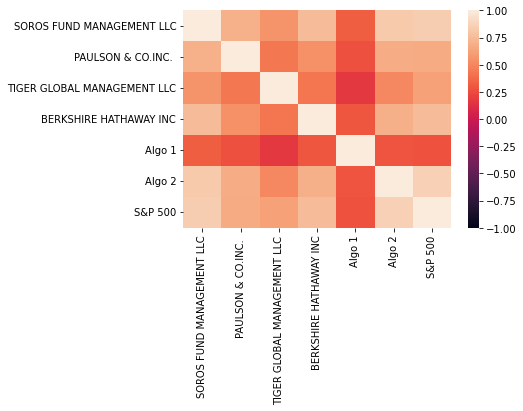

In [22]:
# Calculate the correlation
returns_correlation = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

0.24899091459425635


<AxesSubplot:xlabel='Date'>

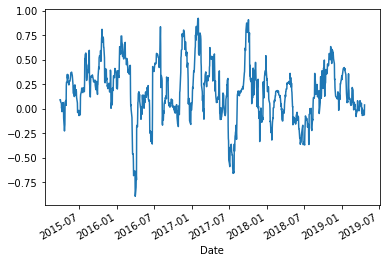

In [23]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
sp_variance = combined_returns['S&P 500'].var()

# Computing Beta
algo1_beta = algo1_covariance / sp_variance
# Prints Beta
print(algo1_beta)

# Calculates and plots the rolling Beta for Algo 1
rolling_covariance_algo1 = combined_returns['Algo 1'].rolling(window=21).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].rolling(window=21).var()
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance
rolling_beta_algo1.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.


In [24]:
# Use `ewm` to calculate the rolling window
daily_std.ewm(halflife=21).std()




SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.              0.000617
TIGER GLOBAL MANAGEMENT LLC    0.002050
BERKSHIRE HATHAWAY INC         0.002736
Algo 1                         0.002546
Algo 2                         0.002295
S&P 500                        0.002089
dtype: float64

<AxesSubplot:xlabel='Date'>

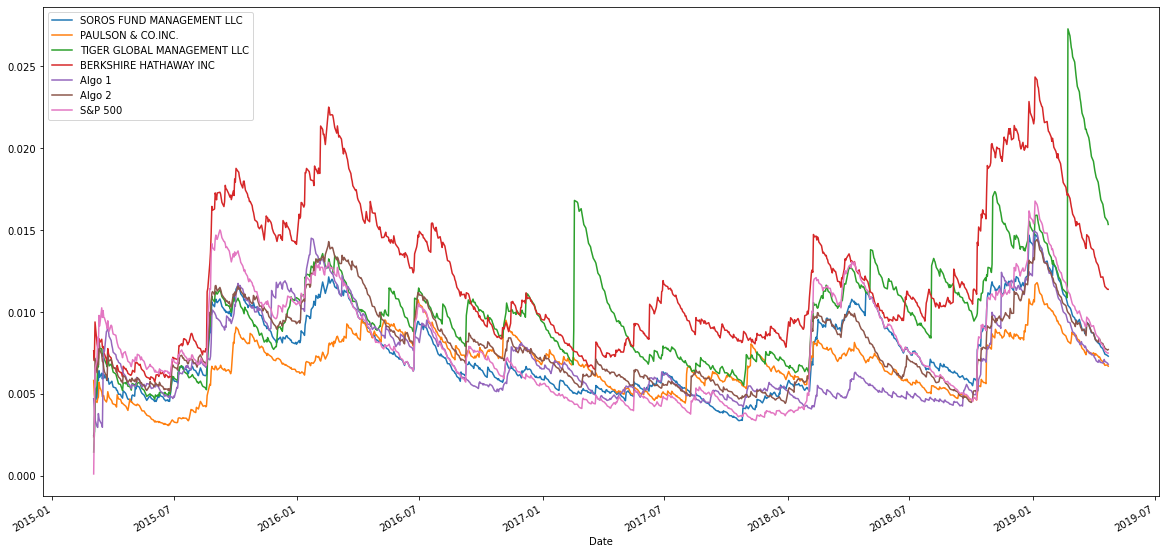

In [49]:
# Plot ewm of return
combined_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Import risk_free_rate.csv into a dataframe
risk_fee_rate_file = Path("Resources/risk_free_rate.csv")
rfr_df = pd.read_csv(risk_fee_rate_file, infer_datetime_format = True, parse_dates = True, index_col = "Date")

# Concatinate rfr_df with combined_returns to execute comparison
updated_returns_df = pd.concat([combined_returns, rfr_df], axis="columns", join="inner")

# Calculate the Sharpe Ratios
sharpe_ratios = ((updated_returns_df.mean() - updated_returns_df['rf_rate'].mean()) * 252) / (updated_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.203632
PAULSON & CO.INC.             -0.703093
TIGER GLOBAL MANAGEMENT LLC   -0.280734
BERKSHIRE HATHAWAY INC         0.521263
Algo 1                         1.147535
Algo 2                         0.314133
S&P 500                        0.492225
rf_rate                        0.000000
dtype: float64

<AxesSubplot:>

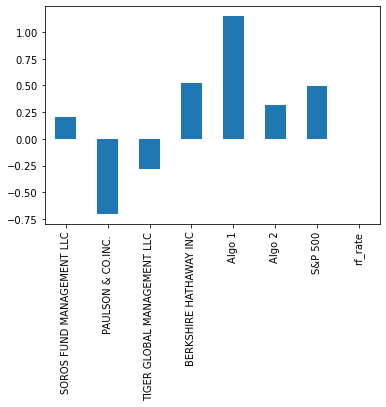

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Pull data for a list of stock contained in "ticker" directly into a dataframe called price_data
ticker = ['NVDA', 'QCOM', 'EXC', 'ILMN', 'MDT']
price_data = web.get_data_yahoo(ticker, start='2015-03-03', end='2019-04-23')

# Reorganizing and displaying the relevant closing data
price_data.drop(columns=['Adj Close', 'Open', 'Volume', 'High', 'Low'], inplace = True)
price_data.columns = ['NVDA', 'QCOM', 'EXE', 'ILMN', 'MDT']
price_data

,NVDA,QCOM,EXE,ILMN,MDT
Date,,,,,
2015-03-03,5.545000,71.410004,23.552069,196.029999,78.029999
2015-03-04,5.607500,70.849998,23.266762,192.679993,78.190002
2015-03-05,5.715000,70.930000,23.516405,200.130005,78.500000
2015-03-06,5.637500,71.510002,23.017118,193.139999,76.480003
2015-03-09,5.652500,72.709999,22.895863,193.070007,76.900002
...,...,...,...,...,...
2019-04-16,47.052502,70.449997,35.092724,329.500000,86.150002
2019-04-17,46.822498,79.080002,34.871613,318.690002,84.730003
2019-04-18,46.575001,79.889999,35.235378,319.029999,84.220001


In [29]:
# Calculate daily returns
daily_return_custportfolio = price_data.pct_change()

# Drop NAs
daily_return_custportfolio.dropna(inplace = True)

# Display sample data
daily_return_custportfolio.head()

,NVDA,QCOM,EXE,ILMN,MDT
Date,,,,,
2015-03-04,0.011271,-0.007842,-0.012114,-0.017089,0.002051
2015-03-05,0.019171,0.001129,0.010730,0.038665,0.003965
2015-03-06,-0.013561,0.008177,-0.021231,-0.034927,-0.025732
2015-03-09,0.002661,0.016781,-0.005268,-0.000362,0.005492
2015-03-10,0.017249,-0.011278,0.000935,0.000259,-0.013394


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [30]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio weighted return
weighted_returns = daily_return_custportfolio.dot(weights)
 
# # Display sample data
weighted_returns.head()

Date
2015-03-04   -0.004745
2015-03-05    0.014732
2015-03-06   -0.017455
2015-03-09    0.003861
2015-03-10   -0.001246
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Joins returns for the Custom Portfolio to the original returns DataFrame
updated_combined_returns = pd.concat([combined_returns, weighted_returns], axis="columns", join="inner")
updated_combined_returns.rename(columns = {0: "Custom Portfolio"}, inplace=True)
updated_combined_returns = updated_combined_returns[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'Custom Portfolio', 'S&P 500']]
updated_combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom Portfolio,S&P 500
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004745,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014732,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.017455,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003861,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.001246,-0.016961


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized `std`
updated_annualized_risk = updated_combined_returns.std() * np.sqrt(252)
updated_annualized_risk

SOROS FUND MANAGEMENT LLC      0.125393
PAULSON & CO.INC.              0.111517
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
Algo 1                         0.121018
Algo 2                         0.132492
Custom Portfolio               0.197798
S&P 500                        0.135830
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

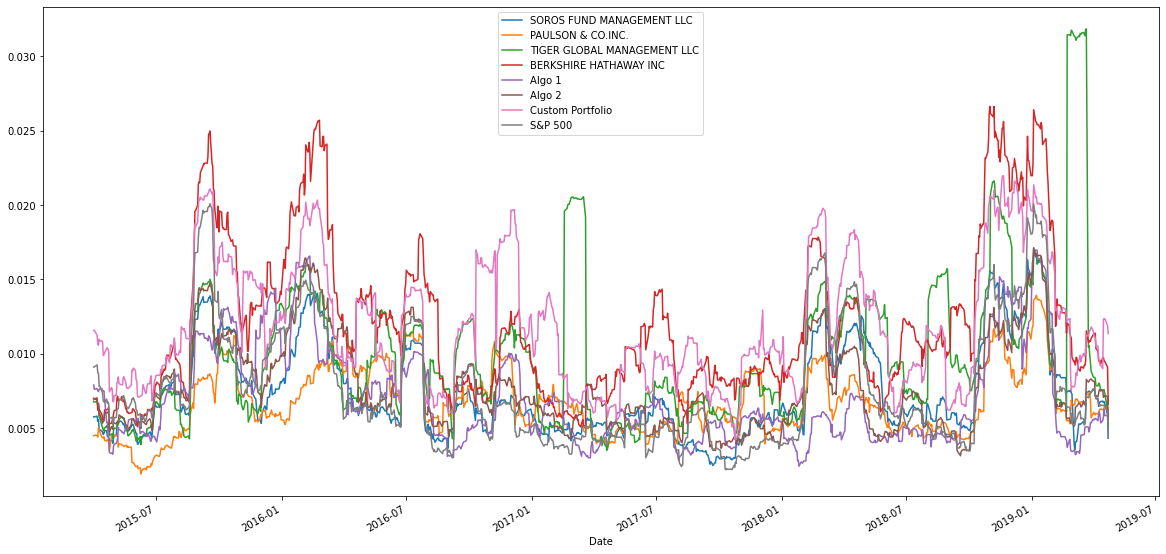

In [33]:
# Calculate rolling standard deviation
updated_rolling_std = updated_combined_returns.rolling(window=21).std()

# Plot rolling standard deviation
updated_rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

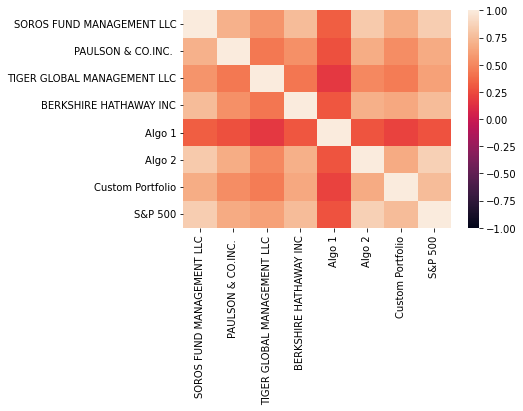

In [34]:
# Calculate and plot the correlation
correlation = updated_combined_returns.corr()

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Custom Portfolio Beta: 1.0935491996342208


<AxesSubplot:title={'center':'60 Day Rolling Beta'}, xlabel='Date'>

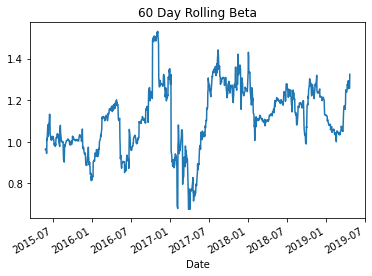

In [36]:
# Calculate and plot Beta
cp_cov = updated_combined_returns['Custom Portfolio'].cov(updated_combined_returns['S&P 500'])

custom_portfolio_beta = cp_cov / sp_variance
print(f"Custom Portfolio Beta: {custom_portfolio_beta}")

rolling_cov_60 = updated_combined_returns['Custom Portfolio'].rolling(window=60).cov(updated_combined_returns['S&P 500'])
rolling_var_60 = updated_combined_returns['S&P 500'].rolling(window=60).var()

rolling_beta_60 = rolling_cov_60 / rolling_var_60
rolling_beta_60.plot(title="60 Day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Calculate Annualized Sharpe Ratios
updated_sharpe_ratios = ((updated_combined_returns.mean() - updated_returns_df['rf_rate'].mean()) * 252) / (updated_combined_returns.std() * np.sqrt(252))
updated_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.145511
PAULSON & CO.INC.             -0.713200
TIGER GLOBAL MANAGEMENT LLC   -0.275173
BERKSHIRE HATHAWAY INC         0.499428
Algo 1                         1.162026
Algo 2                         0.301259
Custom Portfolio               0.941734
S&P 500                        0.459645
dtype: float64

<AxesSubplot:>

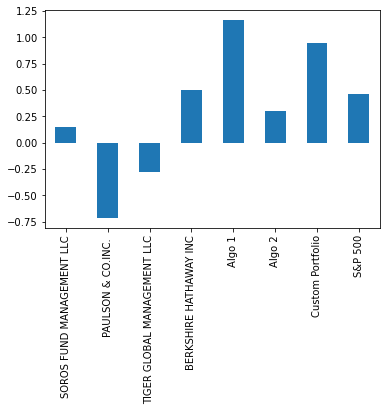

In [38]:
# Visualize the sharpe ratios as a bar plot
updated_sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

The Custom Portfolio (CP) created for this exercise included five companies from a variety of industries. Among the portfolio are Nvidia (know for cumputer graphics), Qualcomm (semicondoctor and wireless communication company), Exelon Corporation (energy), Illumina Inc. (genetics), and Medtronic (medical technology). The goal was to invest in a variety of industries leveraging the cutting edge of technology in their fields.  The result was a profolio that performmed well over the given time period.

By analyzing the annualized volilitiliy of CP, I determined that compared to other portfolios the CP had the second highest volitility at 0.197798 (compared to BERKSHIRE HATHAWAY INC at 0.205146).
`updated_annualized_risk = updated_combined_returns.std() * np.sqrt(252)
updated_annualized_risk

SOROS FUND MANAGEMENT LLC      0.125393
PAULSON & CO.INC.              0.111517
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
Algo 1                         0.121018
Algo 2                         0.132492
Custom Portfolio               0.197798
S&P 500                        0.135830
`
However, this increased inscreased level of risk is also an indication of increased potential for reward. And by recacalculating the Cumulative Returns, we see that the Custom Portfolio indeed delivered on the high returns.

<AxesSubplot:xlabel='Date'>

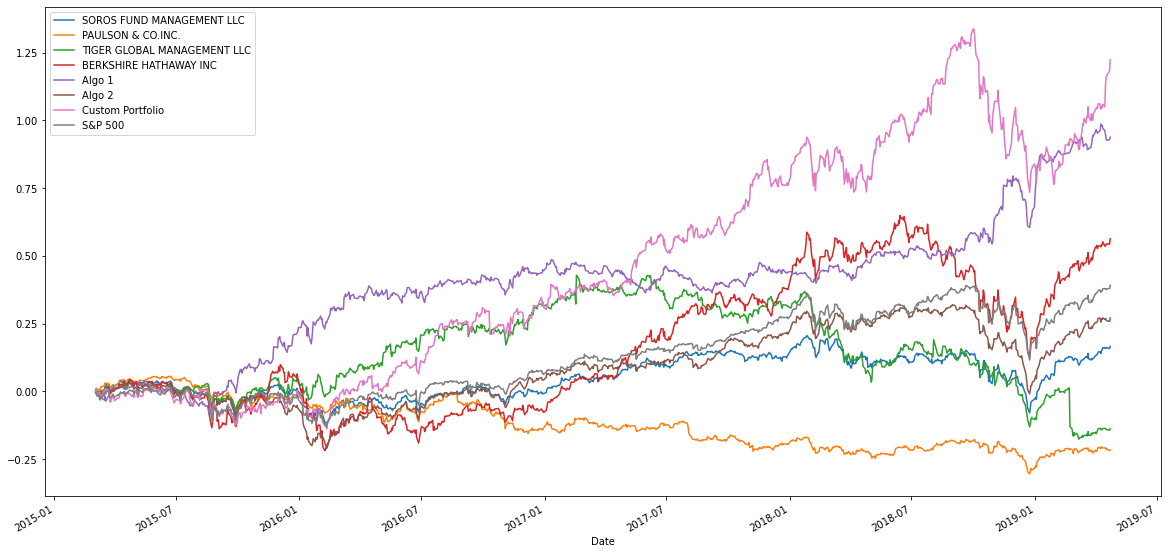

In [45]:
# Updated Cumulative Returns
updated_cumulative_product = (1+ updated_combined_returns).cumprod() - 1
updated_cumulative_product.plot(figsize=(20,10))

Another indication of the overall risk of CP compared to the market is that is has a beta of 1.0935491996342208. Where a beta of 1.0 indicates that an asset or portfolio is on par with the overall market, the CP beta of 1.0935491996342208 indicates that is appriximately 9.35% more risky than the market. Many would feel this is a tolerable level of risk, especially given the ~125% return over period viewed in this analysis

### Sharp Ratio
Another aspect is the Custom Portfolio is its Sharpe Ratio of 0.941734. A Sharpe Ratio measures how much the execess return you receive for holding an asset relative to the risk free rate. Most of the portfolios  in the analysis perform more favorably than holding risk free assets. But only three out perform the S&P 500's 0.459645 Sharpe Ratio:

-BERKSHIRE HATHAWAY INC         0.499428
-Custom Portfolio               0.941734
-Algo 1                         1.162026

The Custom Portfolio has the second highest Sharpe Ratio, inicating that the returns received from this portfolio are worth the relative risk.